In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/My Drive/KT/dataset/train_tweets.txt", sep = ',',encoding='ISO-8859-1', error_bad_lines=False, header=None) 

b'Skipping line 1133: expected 4 fields, saw 5\nSkipping line 1164: expected 4 fields, saw 5\nSkipping line 1167: expected 4 fields, saw 6\nSkipping line 1168: expected 4 fields, saw 5\nSkipping line 1184: expected 4 fields, saw 5\nSkipping line 1896: expected 4 fields, saw 5\nSkipping line 2108: expected 4 fields, saw 6\nSkipping line 2147: expected 4 fields, saw 6\nSkipping line 2273: expected 4 fields, saw 5\nSkipping line 2534: expected 4 fields, saw 5\nSkipping line 2634: expected 4 fields, saw 5\nSkipping line 2744: expected 4 fields, saw 5\nSkipping line 2821: expected 4 fields, saw 5\nSkipping line 2871: expected 4 fields, saw 5\nSkipping line 2875: expected 4 fields, saw 5\nSkipping line 3160: expected 4 fields, saw 5\nSkipping line 3323: expected 4 fields, saw 5\nSkipping line 3995: expected 4 fields, saw 5\nSkipping line 4351: expected 4 fields, saw 5\nSkipping line 4616: expected 4 fields, saw 5\nSkipping line 4629: expected 4 fields, saw 7\nSkipping line 4642: expected 4 f

In [4]:
df.head()

,0,1,2,3
0,110,USER_ce270acf,Forget ma stoopiid friiends!!!,NewYork
1,111,USER_ce270acf,@USER_00791b0d nuttiin much_how bout u!,NewYork
2,112,USER_ce270acf,RT @USER_00791b0d: RT @USER_ce270acf: @USER_00...,NewYork
3,113,USER_ce270acf,@USER_e870cfe3 umm its souljawfy,NewYork
4,114,USER_ce270acf,Smt mommy hurry manqqs :(,NewYork


In [0]:
df.columns = ['TweetID', 'UserName', 'Message', 'Geolocation']

In [0]:
df = df.drop(['TweetID', 'UserName'], axis = 1) #Removing the primary keys, not useful in geolocation

In [7]:
df_validation = pd.read_csv("/content/drive/My Drive/KT/dataset/dev_tweets.txt", sep = ',',encoding='ISO-8859-1', error_bad_lines=False, header=None)
df_validation.columns = ['TweetID', 'UserName', 'Message', 'Geolocation']
df_validation = df_validation.drop(['TweetID', 'UserName'], axis = 1)


b'Skipping line 100: expected 4 fields, saw 5\nSkipping line 103: expected 4 fields, saw 5\nSkipping line 158: expected 4 fields, saw 6\nSkipping line 269: expected 4 fields, saw 6\nSkipping line 280: expected 4 fields, saw 5\nSkipping line 321: expected 4 fields, saw 5\nSkipping line 1622: expected 4 fields, saw 6\nSkipping line 1978: expected 4 fields, saw 5\nSkipping line 2269: expected 4 fields, saw 6\nSkipping line 2388: expected 4 fields, saw 5\nSkipping line 2500: expected 4 fields, saw 5\nSkipping line 2625: expected 4 fields, saw 5\nSkipping line 3013: expected 4 fields, saw 8\nSkipping line 3283: expected 4 fields, saw 5\nSkipping line 3587: expected 4 fields, saw 5\nSkipping line 3945: expected 4 fields, saw 5\nSkipping line 5237: expected 4 fields, saw 5\nSkipping line 5402: expected 4 fields, saw 5\nSkipping line 5669: expected 4 fields, saw 6\nSkipping line 6335: expected 4 fields, saw 5\nSkipping line 6380: expected 4 fields, saw 6\nSkipping line 6381: expected 4 fields,

In [0]:
from sklearn import preprocessing
from xgboost import XGBClassifier

In [9]:
label_process = preprocessing.LabelEncoder()
label_process.fit(df['Geolocation'])

LabelEncoder()

In [10]:
label_process.classes_ # know all the classes in the document

array(['California', 'Georgia', 'NewYork'], dtype=object)

In [0]:
transform_class = label_process.transform(df['Geolocation']) # creating an array of encoded values based on classes in geolocation

In [0]:
df['location_no'] = transform_class # adding encoded values to new column

In [0]:
df = df.drop('Geolocation', axis = 1) 

In [0]:
label_process_val = preprocessing.LabelEncoder()
label_process_val.fit(df_validation['Geolocation'])
transform_class_val = label_process_val.transform(df_validation['Geolocation'])
df_validation['location_no'] = transform_class_val # adding encoded values to new column

In [0]:
df_validation = df_validation.drop('Geolocation', axis = 1)

##Feature Engg - CounterVectorisation

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
count_vec = CountVectorizer(stop_words='english')

In [18]:
count_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [19]:
count_vec.fit(df['Message']) # fit the data in the class to vectorise

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
train_data_vector = count_vec.transform(df['Message'])

In [21]:
train_data_vector.shape

(96149, 92790)

In [0]:
#count_vec.fit(df_validation['Message'])
validation_data_vector = count_vec.transform(df_validation['Message'])

In [23]:
validation_data_vector.shape

(33877, 92790)

In [24]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(train_data_vector, df['location_no'])
y_pred_class = nb.predict(validation_data_vector)
print(accuracy_score(y_pred_class,df_validation['location_no']))

0.6752959234879121


#Logistic Regression on Vectorised Data

In [0]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr_model.fit(train_data_vector,df['location_no'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_res = lr_model.predict(validation_data_vector)

In [29]:
lr_res

array([2, 2, 2, ..., 2, 2, 2])

In [28]:
accuracy_score(lr_res,df_validation['location_no'])

0.6740561442866841

Text(0.5, 15.0, 'Predicted')

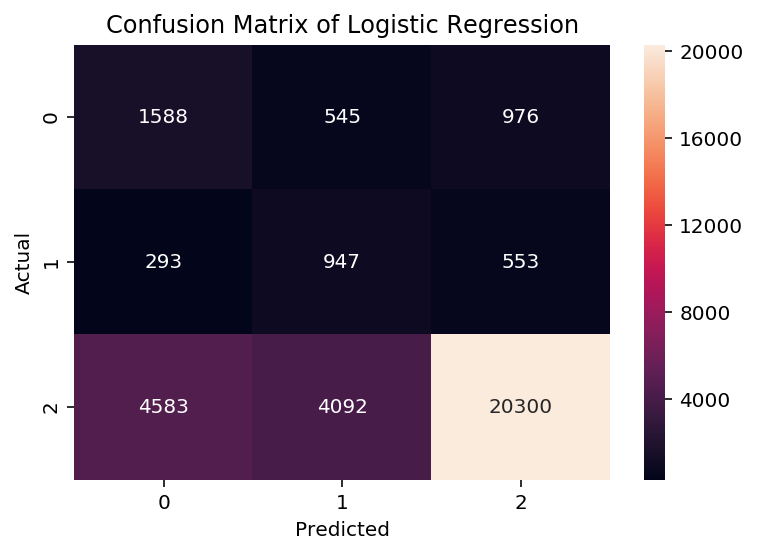

In [29]:
matrix = confusion_matrix(lr_res,df_validation['location_no'])

sns.heatmap(matrix, annot=True, fmt="d")

plt.title('Confusion Matrix of Logistic Regression')

plt.ylabel('Actual')

plt.xlabel('Predicted')

#XGBOOST on Vectorised Data

In [30]:
# fit model no training data
model = XGBClassifier()
model.fit(train_data_vector, df['location_no'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
res = model.predict(validation_data_vector)

In [32]:
accuracy_score(res,df_validation['location_no'])

0.6506774507778138

#RandomForest on Vectorised Data

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest_model = RandomForestClassifier()

In [35]:
random_forest_model.fit(train_data_vector, df['location_no'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
res = random_forest_model.predict(validation_data_vector)

In [37]:
accuracy_score(res,df_validation['location_no'])

0.6135726303982053

#SVM on Vectorised Data

In [0]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')

In [35]:
svclassifier.fit(train_data_vector, df['location_no'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
res = svclassifier.predict(validation_data_vector)

In [37]:
accuracy_score(res,df_validation['location_no'])

0.6443604805620332

#MLP Classifier

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


In [35]:
clf.fit(train_data_vector, df['location_no'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
res = clf.predict(validation_data_vector)

In [37]:
accuracy_score(res,df_validation['location_no'])

0.6443604805620332